<a href="https://colab.research.google.com/github/DamodaraBarbosa/estudos_data_science/blob/main/New_Taipei_City_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
sns.set()

# Carregando os dados em um dataframe

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PracticingDataLinearRegression/Real estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
f'O dataframe contém {data.shape[1]} colunas e {data.shape[0]} linhas.'

'O dataframe contém 8 colunas e 414 linhas.'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Não há nenhum dado faltante em nenhuma das colunas do dataframe!

# Estatísticas descritivas

In [ ]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Tratamentos

## Nome das colunas:

In [ ]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
data.columns = ['No', 'transaction_date', 'house_age', 'distance_MRT_station', 'convenience_stores',
                'latitude', 'longitude', 'price_of_unit_area']

Qual a informação contida em cada coluna?

* `transation_date`: data da transação;
* `house_age`: idade da casa em anos;
* `distance_MRT_station`: distância em metros da estação de metrô mais próxima;
* `convenience_stores`: número de lojas de conveniência próximas da residência;
* `latitude` e `longitude`: coordenadas geográficas;
* `price_of_unite_area`: na unidade de 10000 Dolár taiwanês/Ping, um Ping equivale a 3,3 m².

Fonte: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

# Análise estatística e exploratória dos dados

## Idade da casa (`house_age`)

In [ ]:
data['house_age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: house_age, dtype: float64

* Número de casas em determinados intervalos de idade:

In [ ]:
bins = [0, 5, 10, 20, 30, 40, 50]

In [ ]:
labels = ['Entre 0 e 5', 'Entre 5 e 10', 'Entre 10 e 20', 
          'Entre 20 e 30', 'Entre 30 e 40', 'Entre 40 e 50']

In [ ]:
house_age_cut = pd.cut(data['house_age'], bins= bins, labels= labels, include_lowest= True).value_counts()

In [ ]:
# para garantir que o gráfico plotado siga a ordem temporal, com grupos com menor idade primeiro e mais idade por último:

house_age_cut = house_age_cut[['Entre 0 e 5', 'Entre 5 e 10', 'Entre 10 e 20', 
                               'Entre 20 e 30', 'Entre 30 e 40', 'Entre 40 e 50']]

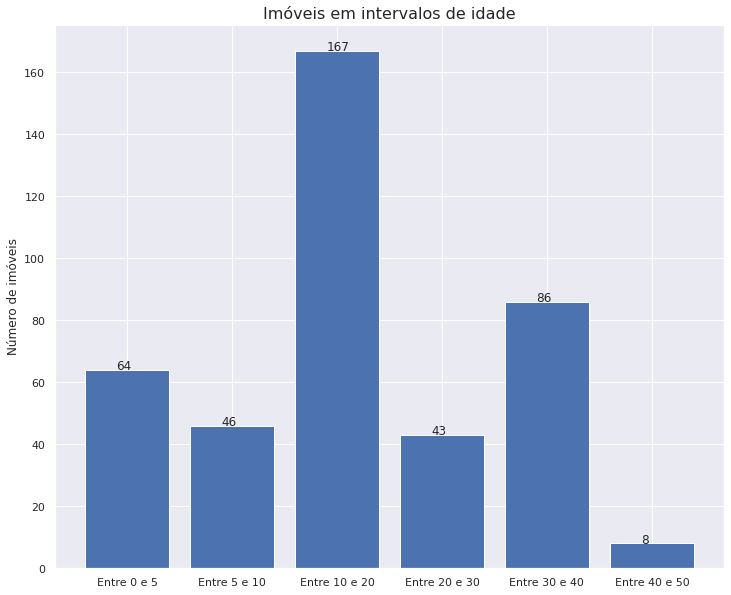

In [ ]:
plt.figure(figsize= (12, 10))
bars = plt.bar(house_age_cut.keys(), house_age_cut.values)

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.3, value, value)

plt.title('Imóveis em intervalos de idade', fontsize= 16)
plt.ylabel('Número de imóveis')
plt.show()

* Distribuição dos dados de `house_age` X `price_of_unit_area`:

In [ ]:
data['price_of_unit_area'].shape

(414,)

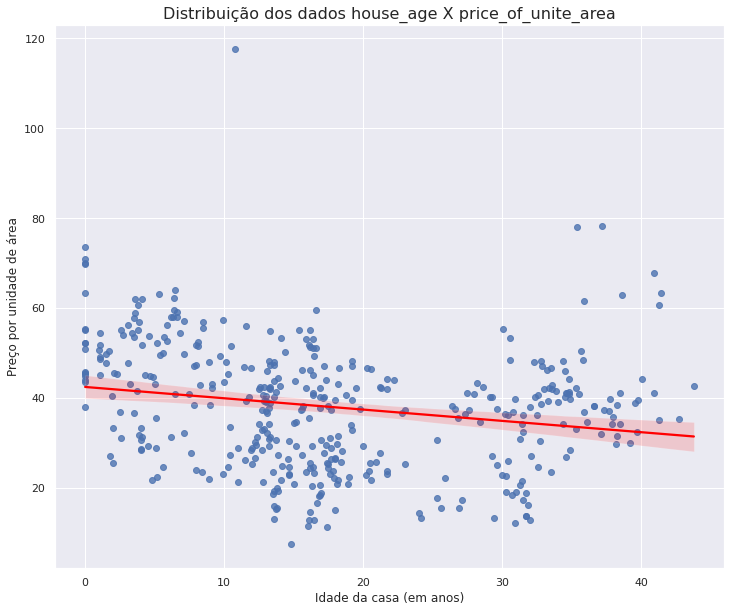

In [ ]:
plt.figure(figsize= (12, 10))
ax = sns.regplot(x= data['house_age'], y= data['price_of_unit_area'], line_kws= {'color': 'red'})
ax.set_title('Distribuição dos dados house_age X price_of_unite_area', fontsize= 16)
plt.ylabel('Preço por unidade de área')
plt.xlabel('Idade da casa (em anos)')
plt.show()

É possível observar uma tendência de diminuição do preço por unidade de área quanto mais antigo o imóvel.

* Distribuição de frequência dos dados da coluna `house_age`:

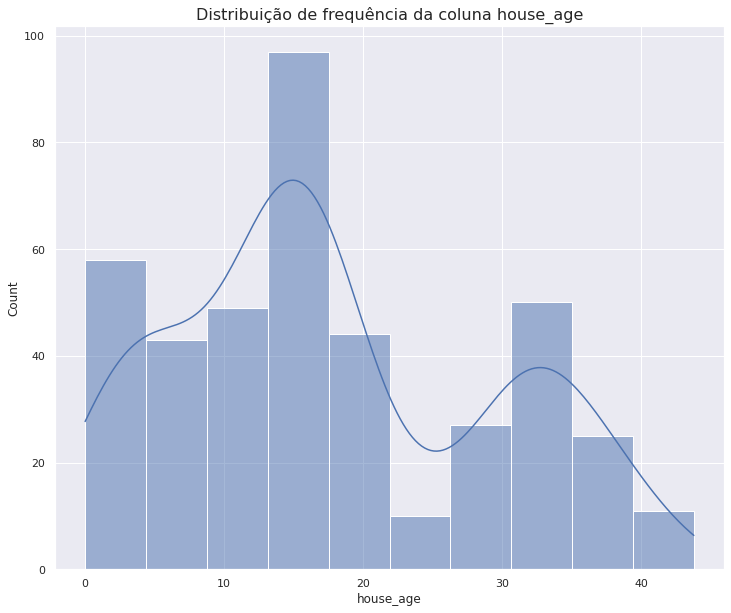

In [ ]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= data, x= 'house_age', kde= True)
ax.set_title('Distribuição de frequência da coluna house_age',fontsize= 16)
plt.show()

* Visualizando a distribuição dos dados da coluna `house_age` em um *boxplot*:

In [ ]:
fig = px.box(data['house_age'], title= 'Boxplot da coluna house_age')
fig.update_layout(title= {'x': 0.5}, yaxis= {'title': 'Idade (em anos)'},
                  xaxis= {'title': ''})

## Distância da estação de metrô mais próxima (`distance_MRT_station`)

In [ ]:
data['distance_MRT_station'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: distance_MRT_station, dtype: float64

* Intervalos de distância em metros das estações de metrô:

In [ ]:
bins = [20, 1300, 2600, 3900, 5200, 6500] 

In [ ]:
labels = ['Entre 20 e 1300', 'Entre 1300 e 2600', 'Entre 2600 e 3900', 'Entre 3900 e 5200', 'Entre 5200 e 6500']

In [ ]:
distance_MRT_cut = pd.cut(data['distance_MRT_station'], bins= bins, labels= labels, include_lowest= True).value_counts()
distance_MRT_cut

Entre 20 e 1300      293
Entre 1300 e 2600     77
Entre 3900 e 5200     29
Entre 2600 e 3900     10
Entre 5200 e 6500      5
Name: distance_MRT_station, dtype: int64

In [ ]:
# a fim de garantir a ordem pelos intervalos:

distance_MRT_cut = distance_MRT_cut[['Entre 20 e 1300', 'Entre 1300 e 2600', 'Entre 2600 e 3900', 'Entre 3900 e 5200', 'Entre 5200 e 6500']]

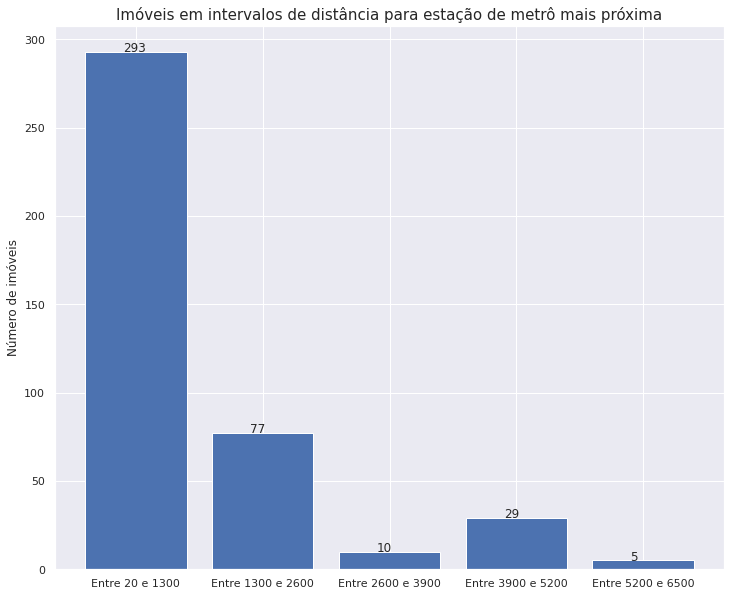

In [ ]:
plt.figure(figsize= (12, 10))
bars = plt.bar(distance_MRT_cut.keys(), distance_MRT_cut.values)

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.3, value + 0.2, value)

plt.title('Imóveis em intervalos de distância para estação de metrô mais próxima', fontsize= 15)
plt.ylabel('Número de imóveis')
plt.show()

In [ ]:
print(f'A maior parte dos imóveis, que são {293 + 77}, estão situados entre 20 e 2600 m de distância da estão de metrô mais próxima.')
print(f'O que corresponde a {(((293 + 77)/data.shape[0]) * 100):.2f}% dos imóveis na base de dados.')

A maior parte dos imóveis, que são 370, estão situados entre 20 e 2600 m de distância da estão de metrô mais próxima.
O que corresponde a 89.37% dos imóveis na base de dados.


* Distribuição dos dados de `distance_MRT_station` X `price_of_unit_area`:

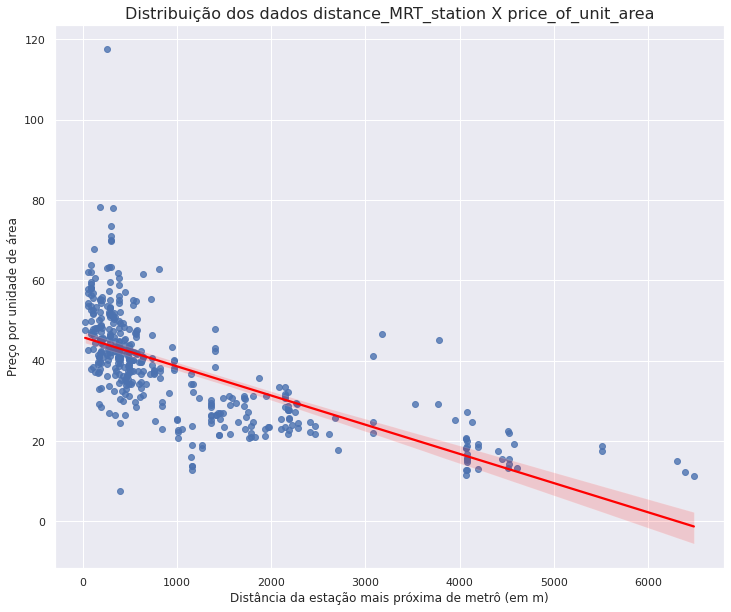

In [ ]:
plt.figure(figsize= (12, 10))
ax = sns.regplot(data= data, x= 'distance_MRT_station', y= 'price_of_unit_area', line_kws= {'color': 'red'})
ax.set_title('Distribuição dos dados distance_MRT_station X price_of_unit_area', fontsize= 16)
plt.ylabel('Preço por unidade de área')
plt.xlabel('Distância da estação mais próxima de metrô (em m)')
plt.show()

É visível a tendência de diminuição do preço por unidade de área quanto mais distante o imóvel for de uma estação de metrô.

* Distribuição de frequência da coluna `distance_MRT_estation`:

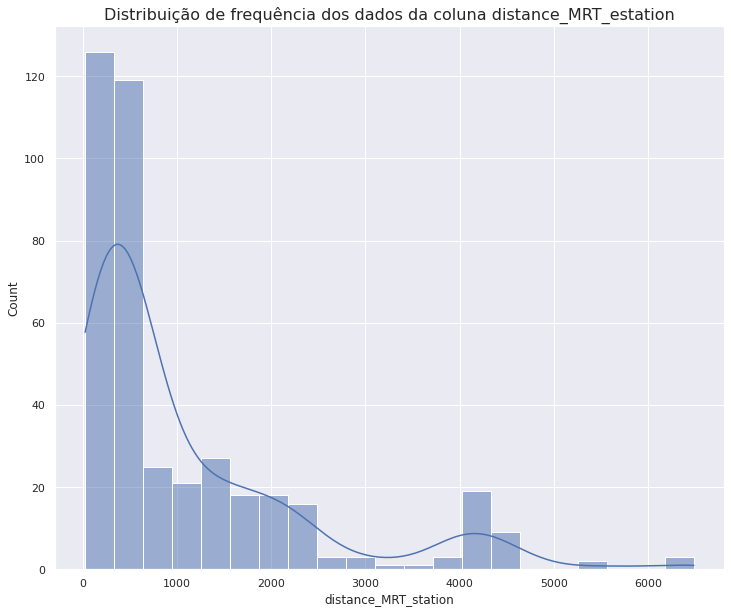

In [ ]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data['distance_MRT_station'], kde= True)
ax.set_title('Distribuição de frequência dos dados da coluna distance_MRT_estation', fontsize= 16)
plt.show()

* Distribuição dos dados da coluna `distance_MRT_station` em um *boxplot*:

In [ ]:
fig = px.box(data['distance_MRT_station'], title= 'Boxplot da coluna distance_MRT_station')
fig.update_layout(title= {'x': 0.5}, yaxis= {'title': 'Distância (em m)'}, xaxis= {'title': ''})

Alguns dados podem ser observados, valores elevados que podem ser *outliers*.

## Número de lojas de conveniência (`convenience_stores`)

In [ ]:
data['convenience_stores'].describe()

count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: convenience_stores, dtype: float64

* Intervalos da quantidade de lojas de conveniência próximas aos imóveis:

In [ ]:
number_of_stores = data['convenience_stores'].value_counts()

In [ ]:
number_of_stores

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: convenience_stores, dtype: int64

In [ ]:
# para organizar pelo número de lojas de conveniência:

number_of_stores = number_of_stores[[n for n in range(0, 11)]]

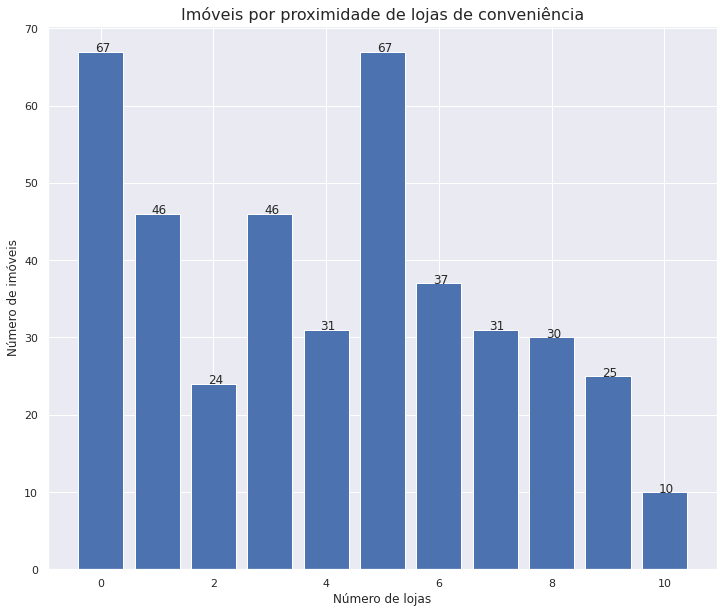

In [ ]:
plt.figure(figsize= (12, 10))
bars = plt.bar(number_of_stores.keys(), number_of_stores.values)

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.3, value, value)

plt.title('Imóveis por proximidade de lojas de conveniência', fontsize= 16)
plt.ylabel('Número de imóveis')
plt.xlabel('Número de lojas')
plt.show()

É possível notar que uma quantidade considerável de imóveis não possui qualquer loja de conveniência próxima da sua localização.

In [ ]:
f"São {(data['convenience_stores'].value_counts(normalize= True)[0] * 100):.2f}% dos imóveis na base de dados."

'São 16.18% dos imóveis na base de dados.'

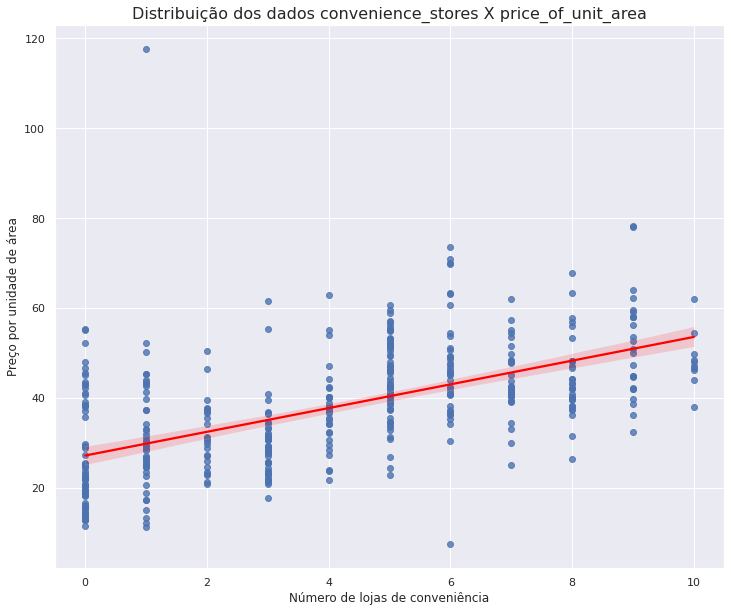

In [ ]:
plt.figure(figsize= (12, 10))
ax = sns.regplot(data= data, x= 'convenience_stores', y= 'price_of_unit_area', line_kws= {'color': 'red'})
ax.set_title('Distribuição dos dados convenience_stores X price_of_unit_area', fontsize= 16)
plt.ylabel('Preço por unidade de área')
plt.xlabel('Número de lojas de conveniência')
plt.show()

O preço por unidade de área cresce quanto mais lojas de conveniência existirem próximo ao imóvel.

* Distribuição de frequência dos dados da coluna `convenience_stores`:

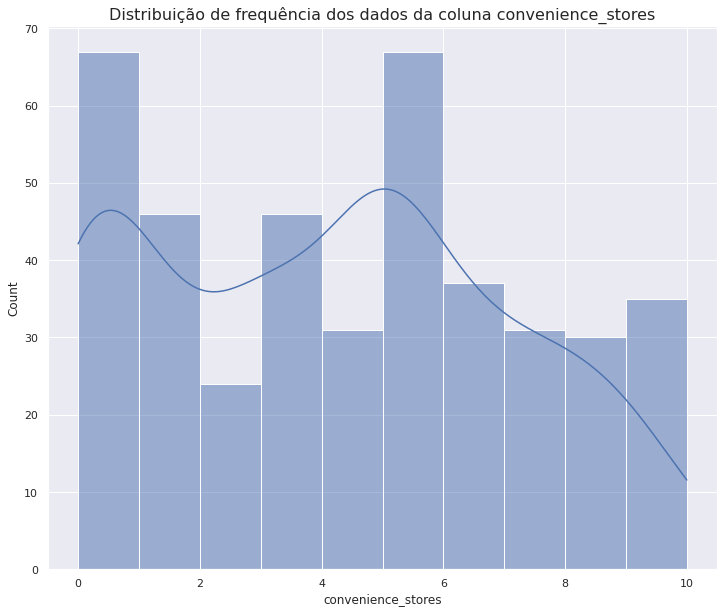

In [ ]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data['convenience_stores'], kde= True)
ax.set_title('Distribuição de frequência dos dados da coluna convenience_stores', fontsize= 16)
plt.show()

* Visualizando a distribuição dos dados da coluna `convenience_stores` em um *boxplot*:

In [ ]:
fig = px.box(data['convenience_stores'], title= 'Boxplot da coluna convenience_stores')
fig.update_layout(title= {'x': 0.5}, yaxis= {'title': 'Número de lojas'}, xaxis= {'title': ''})

# Preço por unidade de área (`price_of_unit_area`)

In [ ]:
data['price_of_unit_area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: price_of_unit_area, dtype: float64

* Distribuição de frequência da coluna `price_of_unit_area`:

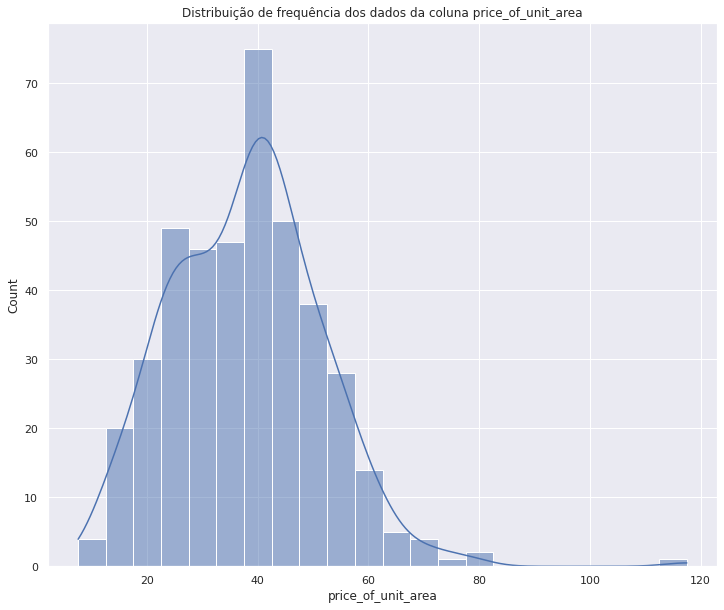

In [ ]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data['price_of_unit_area'], kde= True)
ax.set_title('Distribuição de frequência dos dados da coluna price_of_unit_area')
plt.show()

* Distribuição dos dados da coluna `price_of_unit_area` em um *boxplot*:

In [ ]:
fig = px.box(data['price_of_unit_area'], title= 'Boxplot da coluna price_of_unit_area')
fig.update_layout(title= {'x': 0.5},  yaxis= {'title': 'Preços'}, xaxis= {'title': ''})

Há dois possíveis *outliers* entre os dados da coluna `price_of_unit_area`.

# Análise de correlação

In [ ]:
data.corr()

,No,transaction_date,house_age,distance_MRT_station,convenience_stores,latitude,longitude,price_of_unit_area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
transaction_date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_MRT_station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
convenience_stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price_of_unit_area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Plota-se um gráfico de calor para observar melhor os dados de correlação entre as variáveis.

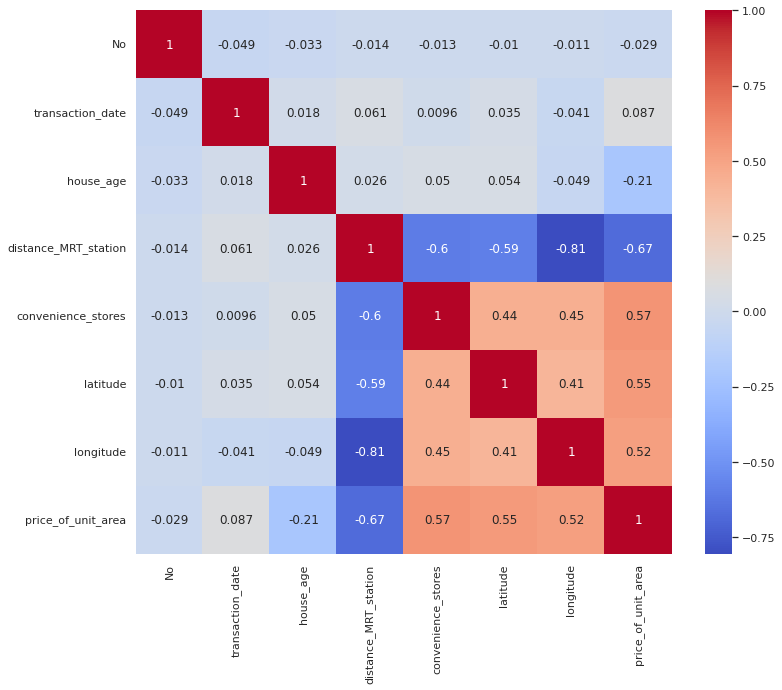

In [ ]:
plt.figure(figsize= (12, 10))
sns.heatmap(data.corr(), annot= True, cmap= 'coolwarm')
plt.show()

Conclusões retiradas do gráfico acima:

* As variáveis `convenience_stores`, `latitude` e `logintude` apresentam correlação positiva forte com a variável `price_of_unit_area`.
* As variáveis `distance_MRT_station` e `house_age` apresentam correlação negativa com a variável `price_of_unit_area`. Sendo a 1ª uma correlação mais forte do que a 2ª.
* A correlação entre a variável `transaction_date`, apesar de negativa em relação à `price_of_unit_area`, é bastante fraca.

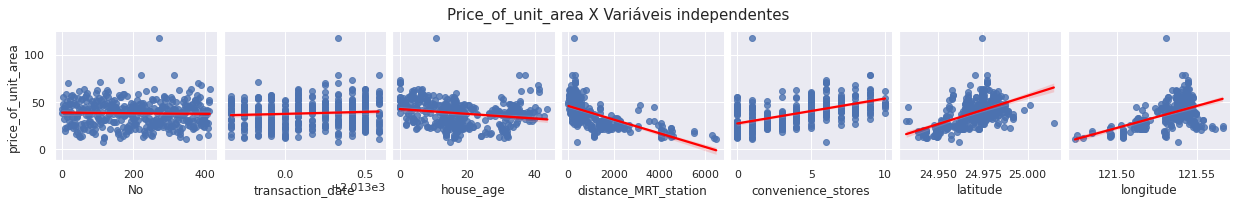

In [ ]:
ax = sns.pairplot(
    data= data, y_vars= 'price_of_unit_area', 
    x_vars= [
        'No', 'transaction_date', 'house_age', 
        'distance_MRT_station', 'convenience_stores',
        'latitude', 'longitude'
    ], kind= 'reg',
    plot_kws= {'line_kws': {'color': 'red'}}
)
ax.fig.suptitle('Price_of_unit_area X Variáveis independentes', fontsize= 15, y= 1.1)
plt.show()

# Modelo de predição (Regressão Linear)

Importando bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Instanciando a variável dependente (y)

In [ ]:
y = data['price_of_unit_area']

## Instanciando as variáveis independentes (x)

---



In [ ]:
X = data[['No', 'transaction_date', 'house_age', 'distance_MRT_station', 'convenience_stores', 'latitude', 'longitude']]

## Definindo variáveis de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 202)

## Instanciando a classe *LinearRegression*

In [ ]:
lr = LinearRegression()

## Treinando o modelo

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
f'O coeficiente de determinação (R²) de treino é: {lr.score(X_train, y_train).round(2)}.'

'O coeficiente de determinação (R²) de treino é: 0.53.'

# Predição dos valores a partir do modelo de regressão linear

In [ ]:
y_predict = lr.predict(X_test)

* Métricas do modelo:

In [ ]:
MSE = metrics.mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
r2 = metrics.r2_score(y_test, y_predict)

In [ ]:
print(f'MSE: {MSE.round(2)}')
print('='*30)
print(f'RMSE: {RMSE.round(2)}')
print('='*30)
print(f'R²: {r2.round(2)}')

MSE: 49.23
RMSE: 7.02
R²: 0.71


* Comparando os valores de y_test e y_predict:

In [ ]:
pd.DataFrame({'y_test': y_test, 'y_predict': y_predict}).sample(20)

,y_test,y_predict
287,32.9,37.344983
399,37.3,39.770691
144,28.4,31.011483
102,54.4,47.728409
252,52.7,49.789137
344,41.2,27.136535
141,28.9,40.015472
198,39.1,40.585801
254,51.8,46.716258
371,51.7,43.613377


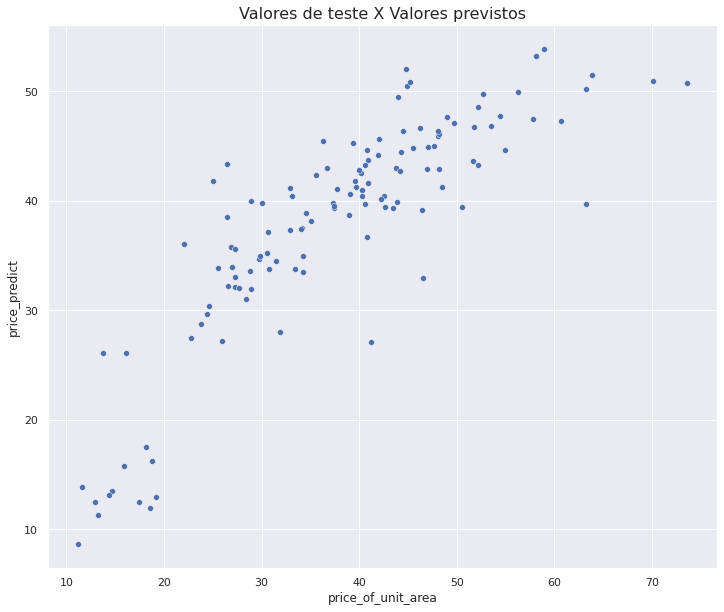

In [ ]:
plt.figure(figsize= (12, 10))
sns.scatterplot(x= y_test, y= y_predict)
plt.title('Valores de teste X Valores previstos', fontsize= 16)
plt.ylabel('price_predict')
plt.show()

* Intercepto e coeficientes de determinação:

In [ ]:
index = ['Intercept', 'No', 'transaction_date', 'house_age', 'distance_MRT_station',
       'convenience_stores', 'latitude', 'longitude']

In [ ]:
coef = pd.DataFrame(np.append(lr.intercept_, lr.coef_), index= index)
coef.columns = ['Coeficientes']
coef

,Coeficientes
Intercept,-8629.815986
No,-0.005994
transaction_date,4.175316
house_age,-0.237288
distance_MRT_station,-0.005056
convenience_stores,0.983915
latitude,203.840507
longitude,-39.663872
